# Game of Thrones Analysis
https://www.kaggle.com/mylesoneill/game-of-thrones

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# Path to data downloaded from Kaggle
PATH_DATA = "/home/pscl/Datasets/game-of-thrones/"
# The names of the datafiles from Kaggle
filenames = ["battles.csv", "character-deaths.csv", "character-predictions.csv"]
# But the data in a dictionary with corresponding label
data = dict(zip(["Battles", "Deaths", "Predictions"], [pd.read_csv(PATH_DATA + fn) for fn in filenames]))

### Battles per region mapped 

In [6]:
from PIL import Image, ImageDraw

deaths_per_region = data["Battles"].region

unique_regions = data["Battles"].region.unique()
battle_counts = data["Battles"].region.value_counts()

coords =  { 'The Westerlands':(150, 550),
            'The Riverlands': (250, 550),
            'The North':      (260, 350),
            'The Stormlands': (450, 820),
            'The Crownlands': (400, 620),
            'Beyond the Wall':(230,  20),
            'The Reach':      (220, 710) }

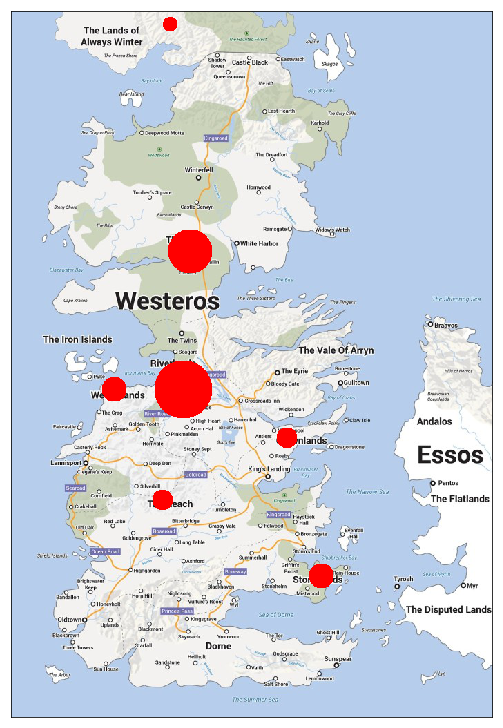

In [10]:
map_image = Image.open("game-of-thrones-map-698x1024.jpg")
# Create image draw object to paint circles
draw = ImageDraw.Draw(map_image)
for region_name in unique_regions:
    r = np.sqrt(battle_counts[region_name])*10
    #r = battle_counts[region_name]*10
    x, y = coords[region_name]
    box = [x-r,y-r,x+r,y+r]
    draw.ellipse(box, fill='red')

fig = plt.figure(figsize=(13,13))
plt.imshow(map_image)
plt.yticks([]); plt.xticks([])
plt.show()

### Battles per region plotted

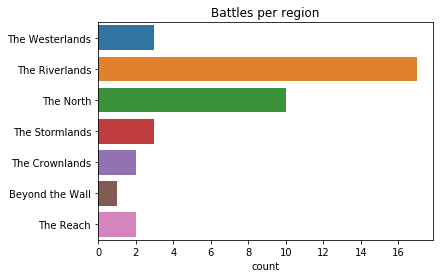

In [11]:
sns.countplot(y=data["Battles"].region)
plt.title("Battles per region")
plt.ylabel("")
plt.show()

### Houses and Kings involved in battle

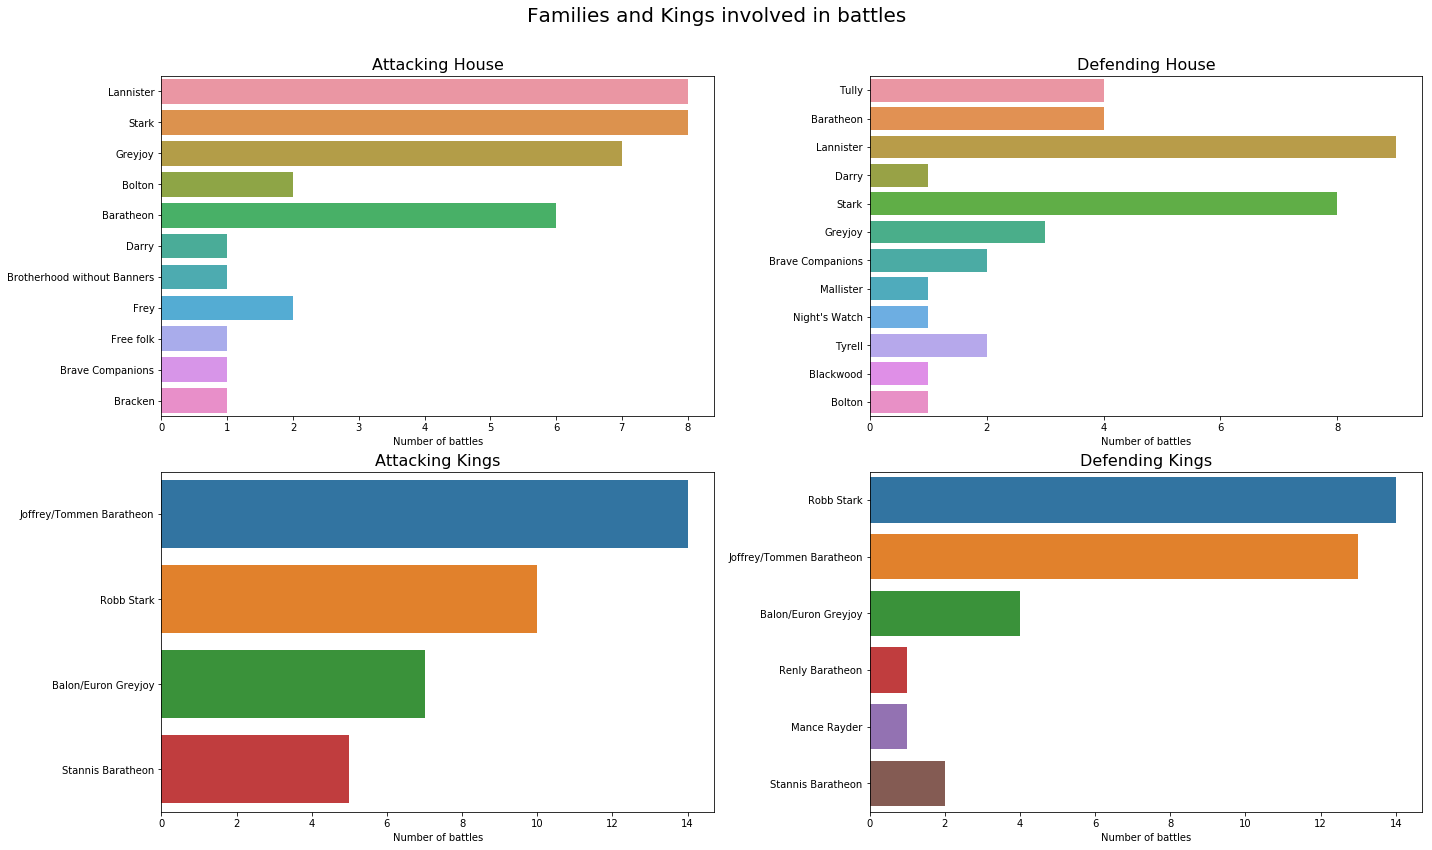

In [12]:
fig = plt.figure(figsize=(20,12))

# Most common attackers
fig.add_subplot(221)
plt.title("Attacking House", size=16)
sns.countplot(y="attacker_1", data=data["Battles"])
plt.ylabel("")
plt.xlabel("Number of battles")

# Most common defenders
fig.add_subplot(222)
plt.title("Defending House", size=16)
sns.countplot(y="defender_1", data=data["Battles"])
plt.ylabel("")
plt.xlabel("Number of battles")

# Kings that attacked
fig.add_subplot(223)
plt.title("Attacking Kings", size=16)
sns.countplot(y="attacker_king", data=data["Battles"])
plt.ylabel("")
plt.xlabel("Number of battles")

# Kings that defended
fig.add_subplot(224)
plt.title("Defending Kings", size=16)
sns.countplot(y="defender_king", data=data["Battles"])
plt.ylabel("")
plt.xlabel("Number of battles")

fig.tight_layout()
fig.suptitle("Families and Kings involved in battles", size=20)
fig.subplots_adjust(top=0.9)
plt.show()

### Deaths by allegiance

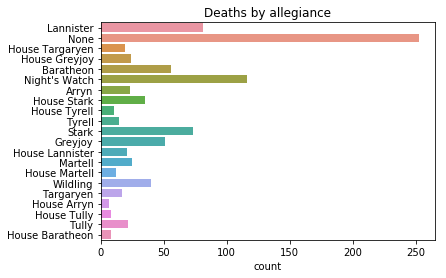

In [13]:
# Most people died in the night's watch
sns.countplot(y="Allegiances", data=data["Deaths"])
plt.title("Deaths by allegiance")
plt.ylabel("")
plt.show()

### Length of character lifes in chapters

In [92]:
chapters = data["Deaths"].dropna(subset=["Book Intro Chapter", "Death Chapter"])[["Death Chapter","Book Intro Chapter","Nobility", "Gender"]]

chapter_life = (chapters["Death Chapter"] - chapters["Book Intro Chapter"])
chapter_life = chapter_life[chapter_life > 0]

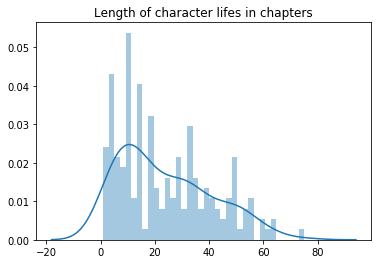

In [93]:
sns.distplot(chapter_life, bins=len(chapter_life)//5)
plt.title("Length of character lifes in chapters")
plt.show()

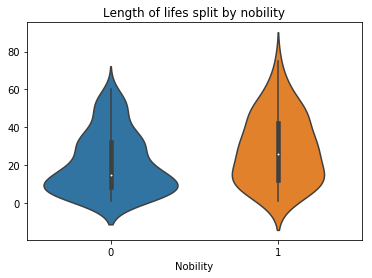

In [94]:
# Lifelength split by nobility
sns.violinplot(x="Nobility", y=chapter_life, data=chapters)
plt.title("Length of lifes split by nobility")
plt.show()

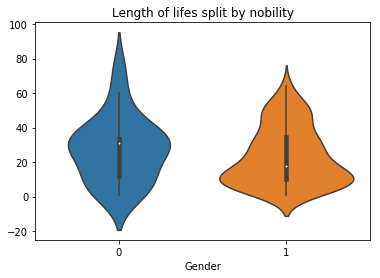

In [95]:
# Lifelength split by chapter
sns.violinplot(x="Gender", y=chapter_life, data=chapters)
plt.title("Length of lifes split by nobility")
plt.show()

In [96]:
chapter_life = pd.Series(chapters["Death Chapter"] - chapters["Book Intro Chapter"], name="Lifelength")
concat_df = pd.concat([chapter_life, chapters["Nobility"], chapters["Gender"]], axis=1).dropna()

In [97]:
ols_results = ols("Lifelength ~ Gender", data = concat_df).fit()
print(ols_results.summary())

# Perform the type 1 one-way ANOVA
anova = anova_lm(ols_results, typ=1)
print(anova)

                            OLS Regression Results                            
Dep. Variable:             Lifelength   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.533
Date:                Tue, 02 Jul 2019   Prob (F-statistic):              0.113
Time:                        15:05:58   Log-Likelihood:                -1336.6
No. Observations:                 296   AIC:                             2677.
Df Residuals:                     294   BIC:                             2685.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.1818      3.864      4.446      0.0

In [98]:
# Difference is visible, but not significant